In [1]:
%matplotlib notebook
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy import units as u
import tarfile
import sqlite3
#import lsst.daf.persistence as dafPersist
#sys.path.append('/epyc/users/mrawls/premap2019/ap_pipe-notebooks/')
#from apdbPlots import makeSrcTableFlags

## MILLIQUAS Plots, Take 2 (1 subset only)

In [2]:
MILLI_sub1 = pd.read_csv('/epyc/users/mrawls/milliquas1.txt', 
                         sep = '|',header=2, usecols = [2,3,4,5,6,7,8,9])
MILLI_sub1.head()

,ra,dec,bmag,rmag,redshift,radio_name,xray_name,class
0,10 21 43.31,-07 59 38.5,18.25,17.85,2.144,,,QSO TYPE 1
1,10 19 47.91,-07 56 55.3,21.85,19.11,,,,RADIO GALAXY
2,10 18 34.93,-07 56 38.6,21.18,20.28,2.300,,,QSO TYPE 1
3,10 19 08.48,-07 56 37.7,19.00,18.70,0.600,,,QSO TYPE 1
4,10 23 45.43,-07 55 30.7,19.67,19.25,1.400,,,QSO TYPE 1


In [6]:
MILLI_sub1.rename(columns=lambda x: x.strip(), inplace=True)
MILLI_sub1.columns

Index(['ra', 'dec', 'bmag', 'rmag', 'redshift', 'radio_name', 'xray_name',
       'class'],
      dtype='object')

In [9]:
print(MILLI_sub1['ra'].iloc[0])

10 21 43.31


I looked at the `ra` and `dec` column definitions in the MILLIQUAS quasar table, and it has RA limits from 0 to 24 and Dec limits from -90 to +90. From this, I inferred RA is in hours and Dec is in degrees (oy).

In [18]:
raTest = Angle(MILLI_sub1['ra'].iloc[0], unit='hour')
decTest = Angle(MILLI_sub1['dec'].iloc[0], unit='degree')
print(raTest.deg)
print(decTest.deg)

155.43045833333332
-7.994027777777778


In [19]:
ra_deg_list = []
dec_deg_list = []
for index, row in MILLI_sub1.iterrows():
    ra_deg = Angle(row['ra'], unit='hour').deg
    ra_deg_list.append(ra_deg)
    dec_deg = Angle(row['dec'], unit='deg').deg
    dec_deg_list.append(dec_deg)
MILLI_sub1['ra_deg'] = pd.Series(ra_deg_list, index=MILLI_sub1.index)
MILLI_sub1['dec_deg'] = pd.Series(dec_deg_list, index=MILLI_sub1.index)

In [20]:
MILLI_sub1

,ra,dec,bmag,rmag,redshift,radio_name,xray_name,class,ra_deg,dec_deg
0,10 21 43.31,-07 59 38.5,18.25,17.85,2.144,,,QSO TYPE 1,155.430458,-7.994028
1,10 19 47.91,-07 56 55.3,21.85,19.11,,,,RADIO GALAXY,154.949625,-7.948694
2,10 18 34.93,-07 56 38.6,21.18,20.28,2.300,,,QSO TYPE 1,154.645542,-7.944056
3,10 19 08.48,-07 56 37.7,19.00,18.70,0.600,,,QSO TYPE 1,154.785333,-7.943806
4,10 23 45.43,-07 55 30.7,19.67,19.25,1.400,,,QSO TYPE 1,155.939292,-7.925194
5,10 20 05.04,-07 54 58.4,19.65,19.59,0.700,,,QSO TYPE 1,155.021000,-7.916222
6,10 16 36.15,-07 50 38.0,19.41,19.21,2.200,,,QSO TYPE 1,154.150625,-7.843889
7,10 14 46.55,-07 49 42.1,20.03,19.98,2.000,,,QSO TYPE 1,153.693958,-7.828361
8,10 16 45.26,-07 48 22.9,20.29,19.87,0.700,,,QSO TYPE 1,154.188583,-7.806361
9,10 15 19.33,-07 47 53.0,18.72,18.00,1.200,,,QSO TYPE 1,153.830542,-7.798056


<IPython.core.display.Javascript object>


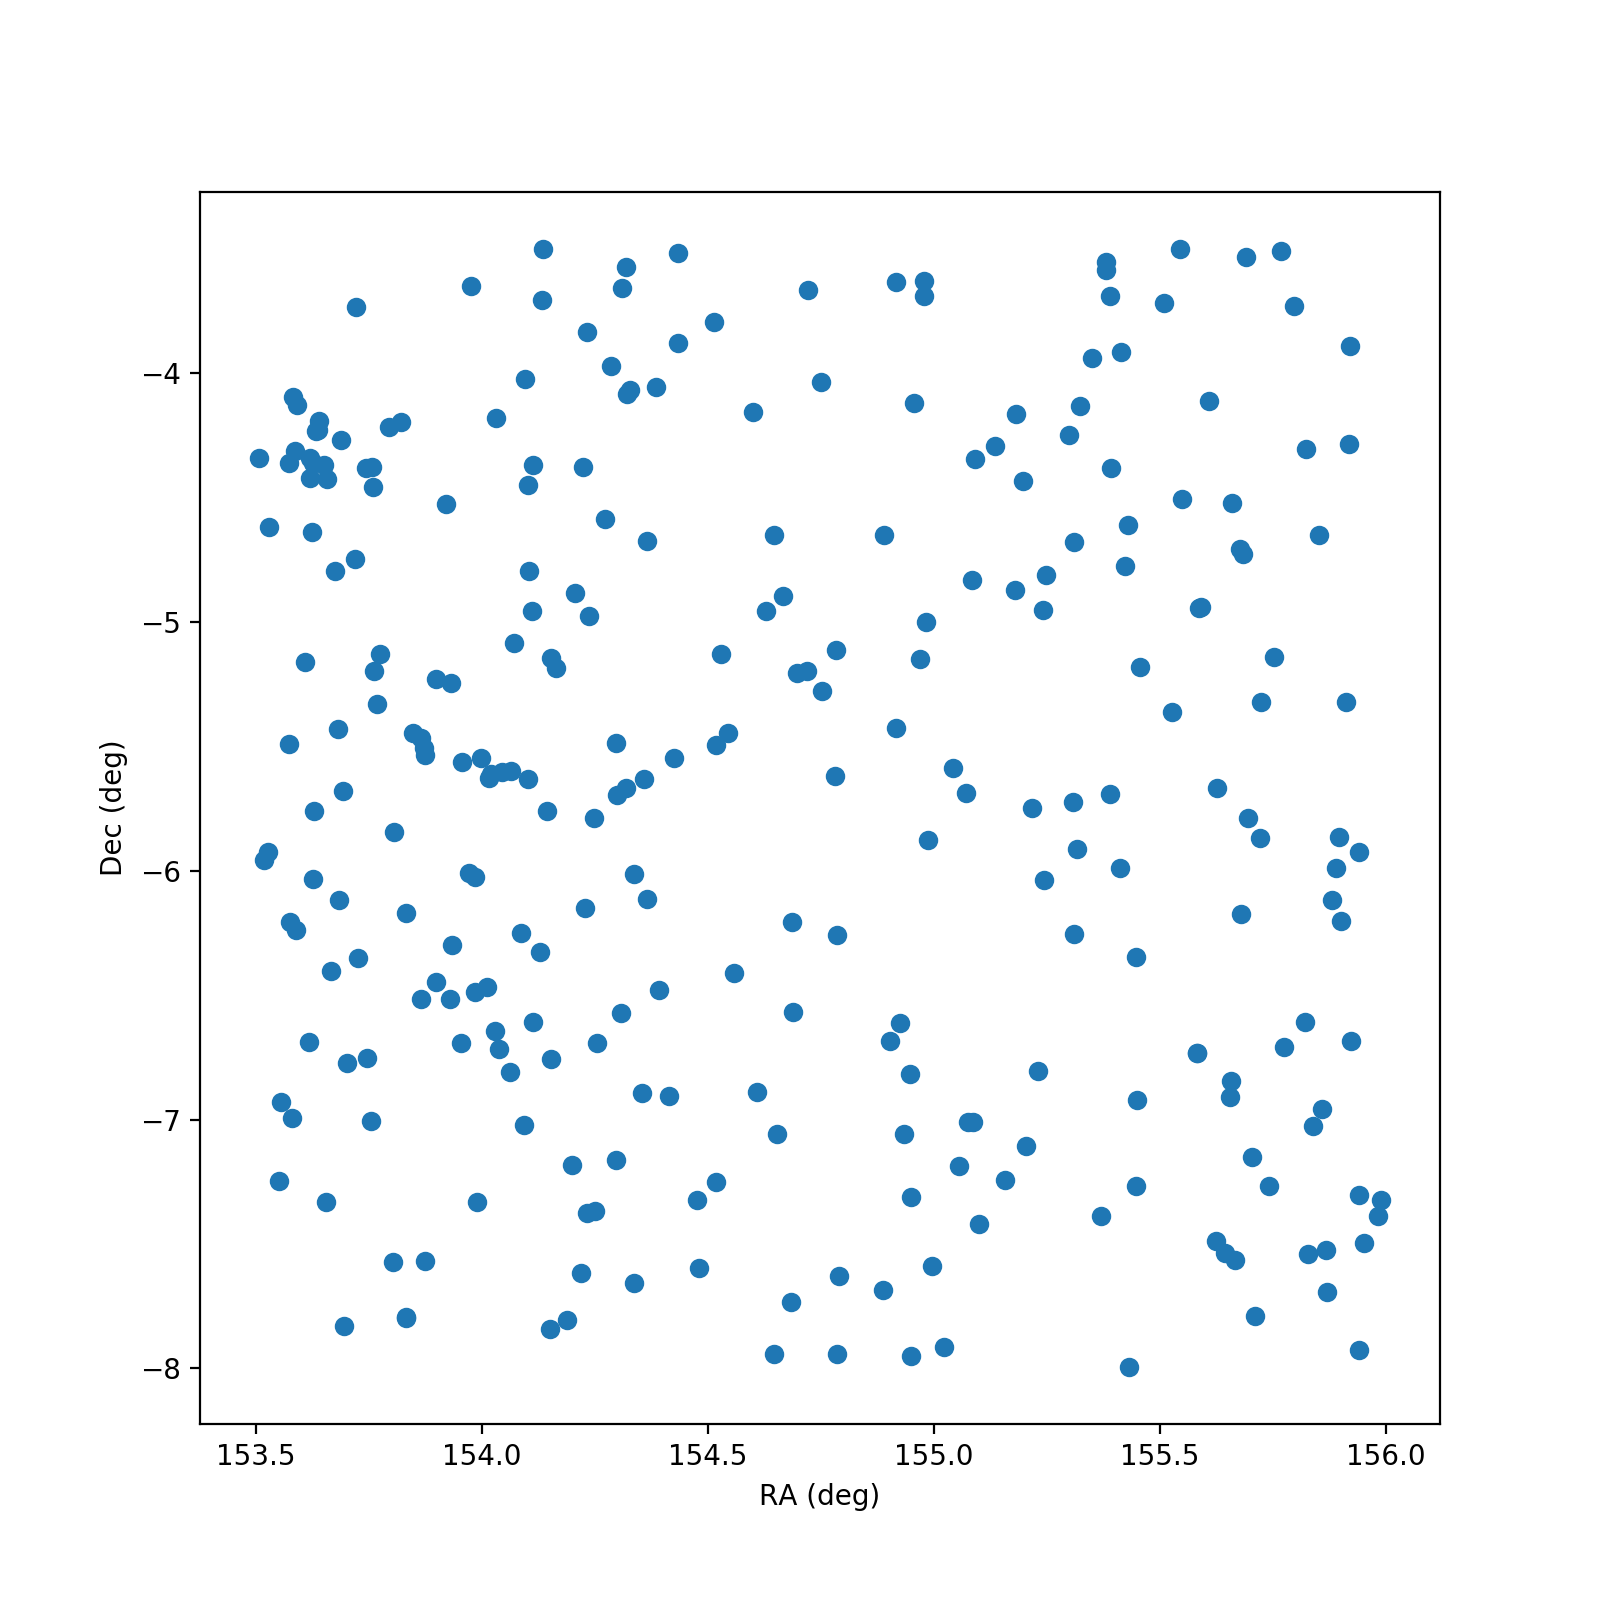

Text(0, 0.5, 'Dec (deg)')

In [23]:
plt.figure(figsize = (8,8))
plt.scatter(MILLI_sub1['ra_deg'].values, MILLI_sub1['dec_deg'].values)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')

In [ ]:
plt.scatter(hitsDf['raMedian'],hitsDf['decMedian'])

* Good news: it works!
* Bad news: it may not be the actual RA/Dec region you were hoping for it to be!